In [102]:
import pandas as pd
import numpy as np

titest= pd.read_csv('train.csv')
titest.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
titest.shape

(891, 12)

Text(0.5, 1.0, 'survived')

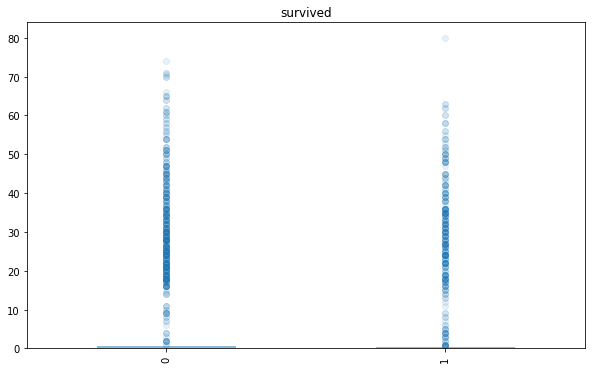

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
titest.Survived.value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.scatter(titest.Survived,titest.Age,alpha=0.1)
plt.title("survived")

Text(0.5, 1.0, 'survived')

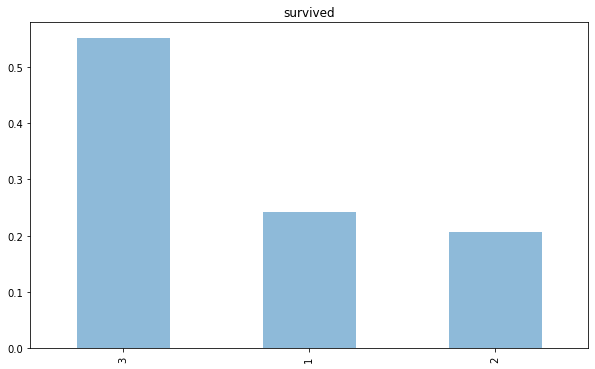

In [105]:
plt.figure(figsize=(10,6))
titest.Pclass.value_counts(normalize=True).plot(kind="bar",alpha=0.5)
#plt.scatter(titanic.Survived,titanic.Age,alpha=0.1)
plt.title("survived")

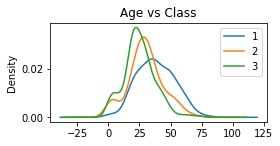

In [106]:
plt.subplot2grid((2,3),(1,0),colspan=2)
for x in [1,2,3]:
    titest.Age[titest.Pclass==x].plot(kind="kde")
    plt.title("Age vs Class")
    plt.legend(("1","2","3"))

Text(0.5, 1.0, 'Male survived')

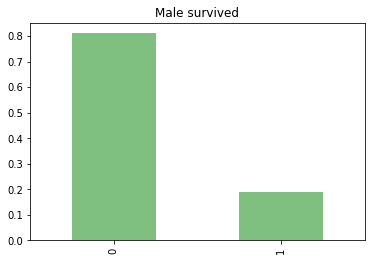

In [107]:
plt.figure(figsize=(6,4))
titest.Survived[titest.Sex=="male"].value_counts(normalize=True).plot(kind="bar",alpha=0.5,color="green")
#plt.scatter(titanic.Survived,titanic.Age,alpha=0.1)
plt.title("Male survived")

Text(0.5, 1.0, 'FeMale survived')

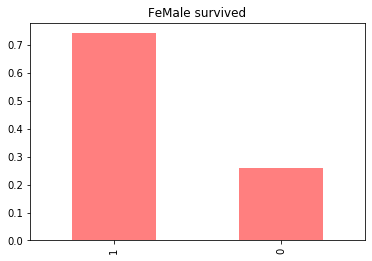

In [108]:
plt.figure(figsize=(6,4))
titest.Survived[titest.Sex=="female"].value_counts(normalize=True).plot(kind="bar",alpha=0.5,color="red")
#plt.scatter(titanic.Survived,titanic.Age,alpha=0.1)
plt.title("FeMale survived")

Text(0.5, 1.0, ' survived')

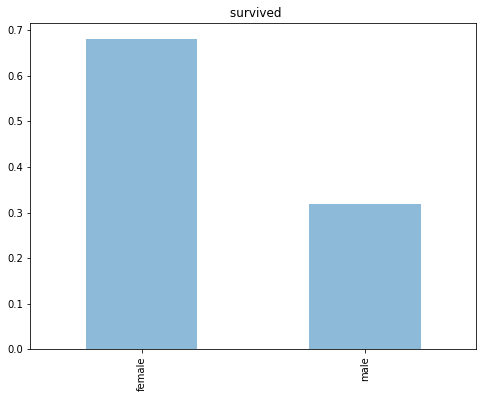

In [109]:
plt.figure(figsize=(8,6))
titest.Sex[titest.Survived==1].value_counts(normalize=True).plot(kind="bar",alpha=0.5)
#plt.scatter(titanic.Survived,titanic.Age,alpha=0.1)
plt.title(" survived")

In [110]:
cols = ['Name','Ticket','Cabin']
titest = titest.drop(cols,axis=1)


In [111]:
titest['Age'] = titest['Age'].interpolate()
titest.shape

(891, 9)

In [112]:
titest.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [113]:
dummies = []
cols = ['Pclass','Sex','Embarked']
for col in cols:
 dummies.append(pd.get_dummies(titest[col]))


In [114]:
titanic_dummies = pd.concat(dummies, axis=1)
titest = pd.concat((titest,titanic_dummies),axis=1)
titest= titest.drop(['Pclass','Sex','Embarked'],axis=1)





In [115]:
titest.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [116]:
X = titest.values
y = titest['Survived'].values


In [117]:
X = np.delete(X,1,axis=1)


In [118]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [119]:
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier(n_estimators=100)
rfc.fit (X_train, y_train)
rfc.score (X_test, y_test)


0.8100558659217877